### Customer Churn of Telecommunicatons 

#### Import Libraries 

In [1]:
!pip install imblearn 


  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
     -------------------------------------- 225.4/225.4 kB 4.6 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [2]:
!pip install xgboost

In [3]:
import pandas as pd
import numpy as np
#Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("F:\\downloads\\telecommunications_churn.csv")
df

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0                128                1                   25     265.1   
1                107                1                   26     161.6   
2                137                0                    0     243.4   
3                 84                0                    0     299.4   
4                 75                0                    0     166.7   
...              ...              ...                  ...       ...   
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3331             184                0                    0     213.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
0            197.4       244.7                10.0                       1   
1            195.5       254.4                13.7                       1   
2            121.2       162.6                12.2                       0   
3             61.9       196.9                 6.6                       2   
4            148.3       186.9                10.1                       3   
...            ...         ...                 ...                     ...   
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3331         159.6       139.2                 5.0                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0        110       45.07             99   
1                      0        123       27.47            103   
2                      0        114       41.38            110   
3                      1         71       50.90             88   
4                      1        113       28.34            122   
...                  ...        ...         ...            ...   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
0              16.78           91         11.01                    3   
1              16.62          103         11.45                    3   
2              10.30          104          7.32                    5   
3               5.26           89          8.86                    7   
4              12.61          121          8.41                    3   
...              ...          ...           ...                  ...   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
0                     2.70         75.56      0  
1                     3.70         59.24      0  
2                     3.29         62.29      0  
3                     1.78         66.80      0  
4                     2.73         52.09      0  
...                    ...           ...    ...  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      

In [5]:
df.head()

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0             128                1                   25     265.1   
1             107                1                   26     161.6   
2             137                0                    0     243.4   
3              84                0                    0     299.4   
4              75                0                    0     166.7   

   evening_mins  night_mins  international_mins  customer_service_calls  \
0         197.4       244.7                10.0                       1   
1         195.5       254.4                13.7                       1   
2         121.2       162.6                12.2                       0   
3          61.9       196.9                 6.6                       2   
4         148.3       186.9                10.1                       3   

   international_plan  day_calls  day_charge  evening_calls  evening_charge  \
0                   0        110       45.07             99           16.78   
1                   0        123       27.47            103           16.62   
2                   0        114       41.38            110           10.30   
3                   1         71       50.90             88            5.26   
4                   1        113       28.34            122           12.61   

   night_calls  night_charge  international_calls  international_charge  \
0           91         11.01                    3                  2.70   
1          103         11.45                    3                  3.70   
2          104          7.32                    5                  3.29   
3           89          8.86                    7                  1.78   
4          121          8.41                    3                  2.73   

   total_charge  churn  
0         75.56      0  
1         59.24      0  
2         62.29      0  
3         66.80      0  
4         52.09      0

In [6]:
df.shape

(3333, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

In [8]:
df.dtypes

account_length              int64
voice_mail_plan             int64
voice_mail_messages         int64
day_mins                  float64
evening_mins              float64
night_mins                float64
international_mins        float64
customer_service_calls      int64
international_plan          int64
day_calls                   int64
day_charge                float64
evening_calls               int64
evening_charge            float64
night_calls                 int64
night_charge              float64
international_calls         int64
international_charge      float64
total_charge              float64
churn                       int64
dtype: object

 From the above information we know that our data set is of integers and float

A higher number of calls placed to customer service in a given period indicates that a customer is facing many problems, and hence, there is a high potential of churning.

Customers with high total billed cost are more likely searching for another operator if they are unhappy with the current service.

In [9]:
df.describe()

account_length  voice_mail_plan  voice_mail_messages     day_mins  \
count     3333.000000      3333.000000          3333.000000  3333.000000   
mean       101.064806         0.276628             8.099010   179.775098   
std         39.822106         0.447398            13.688365    54.467389   
min          1.000000         0.000000             0.000000     0.000000   
25%         74.000000         0.000000             0.000000   143.700000   
50%        101.000000         0.000000             0.000000   179.400000   
75%        127.000000         1.000000            20.000000   216.400000   
max        243.000000         1.000000            51.000000   350.800000   

       evening_mins   night_mins  international_mins  customer_service_calls  \
count   3333.000000  3333.000000         3333.000000             3333.000000   
mean     200.980348   200.872037           10.237294                1.562856   
std       50.713844    50.573847            2.791840                1.315491   
min        0.000000    23.200000            0.000000                0.000000   
25%      166.600000   167.000000            8.500000                1.000000   
50%      201.400000   201.200000           10.300000                1.000000   
75%      235.300000   235.300000           12.100000                2.000000   
max      363.700000   395.000000           20.000000                9.000000   

       international_plan    day_calls   day_charge  evening_calls  \
count         3333.000000  3333.000000  3333.000000    3333.000000   
mean             0.096910   100.435644    30.562307     100.114311   
std              0.295879    20.069084     9.259435      19.922625   
min              0.000000     0.000000     0.000000       0.000000   
25%              0.000000    87.000000    24.430000      87.000000   
50%              0.000000   101.000000    30.500000     100.000000   
75%              0.000000   114.000000    36.790000     114.000000   
max              1.000000   165.000000    59.640000     170.000000   

       evening_charge  night_calls  night_charge  international_calls  \
count     3333.000000  3333.000000   3333.000000          3333.000000   
mean        17.083540   100.107711      9.039325             4.479448   
std          4.310668    19.568609      2.275873             2.461214   
min          0.000000    33.000000      1.040000             0.000000   
25%         14.160000    87.000000      7.520000             3.000000   
50%         17.120000   100.000000      9.050000             4.000000   
75%         20.000000   113.000000     10.590000             6.000000   
max         30.910000   175.000000     17.770000            20.000000   

       international_charge  total_charge        churn  
count           3333.000000   3333.000000  3333.000000  
mean               2.764581     59.449754     0.144914  
std                0.753773     10.502261     0.352067  
min                0.000000     22.930000     0.000000  
25%                2.300000     52.380000     0.000000  
50%                2.780000     59.470000     0.000000  
75%                3.270000     66.480000     0.000000  
max                5.400000     96.150000     1.000000

### Exploring the data
Let's see the value count of our target variable

In [90]:
rr=df['churn'].value_counts()
rr

0    2850
1     483
Name: churn, dtype: int64

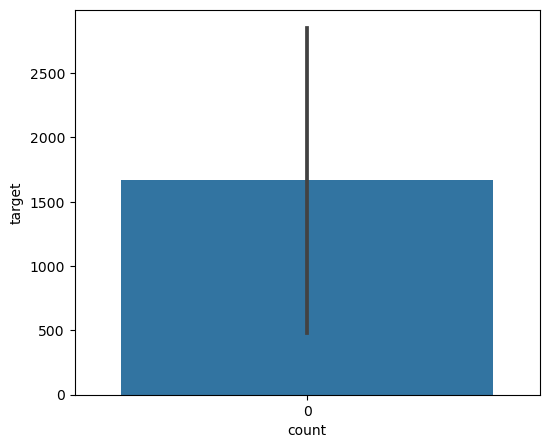

In [11]:
plt.figure(figsize=(6,5))
sns.barplot(data=rr)
plt.xlabel("count")
plt.ylabel("target")
plt.show()

Text(0.5, 1.02, 'Count of TARGET Variable per category')

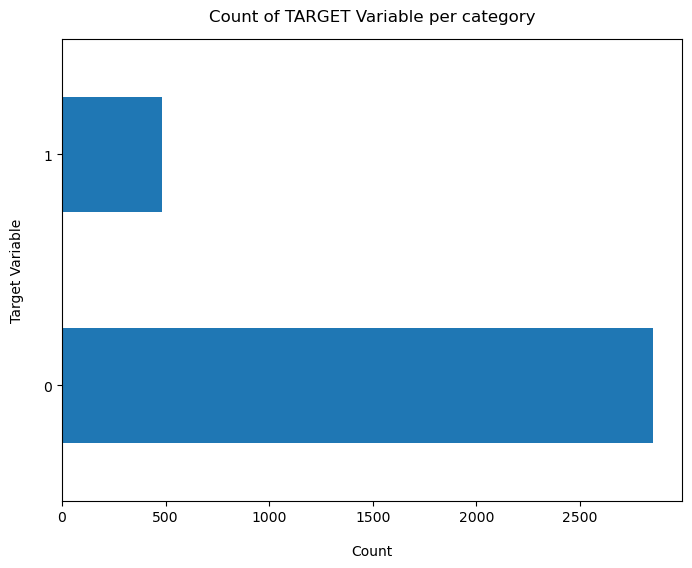

In [12]:
df['churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

In [13]:
100*df['churn'].value_counts()/len(df['churn'])

0    85.508551
1    14.491449
Name: churn, dtype: float64

Out of 3333 customers those who churn are 483 and those who do not churn are 2850
Data is highly imbalanced,ratio = 86:14

In [14]:
df.isnull().sum()

account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64

## Hypotheses Generation

Account Length : the number of days that this account has been active.

VMail Plan : whether the customer has a voice mail feature: yes/no.

VMail Message : presumably the average number of voice mail messages per month.

Day Mins : the total number of calling minutes used during the day.

Night Mins : the total number of calling minutes used during the Night.

evening Mins : the total number of calling minutes used during the evening.

Intl Mins : the total number of international minutes.

CustServ Calls : the number of calls placed to Customer Service.

Int’l Plan : whether the customer has an international calling plan: yes/no.

Day Calls : the total number of calls placed during the day.

Day Charge : the billed cost of daytime calls.

Eve Calls : the total number of calls placed during the evening.

Eve Charge : the billed cost of evening time calls.

Night Calls : the total number of calls placed during the night.

Night Charge : the billed cost of nighttime calls.

Intl Calls : the total number of international calls.

Intl Charge : the billed cost for international calls.

Total Charge : the total cost summing day, eve, night, international charges.

Churn : whether the customer left the service: true/false.

A higher number of calls placed to customer service in a given period indicates that a customer is facing many problems, and hence, there is a high potential of churning.

Customers with high total billed cost are more likely searching for another operator if they are unhappy with the current service.

There are no Null values

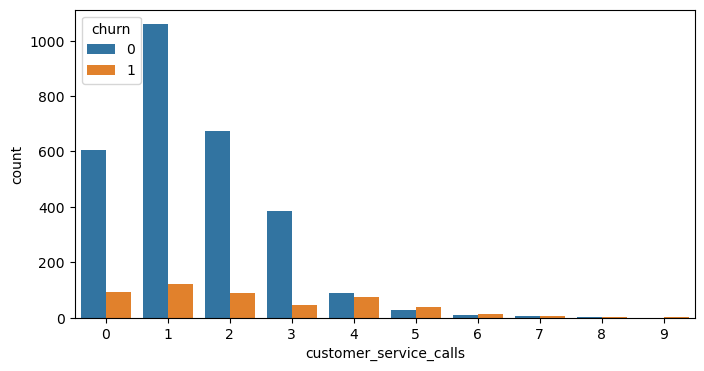

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(x='customer_service_calls', hue='churn', data=df);

the churn rate increases significantly after 4 or more calls to the customer service.

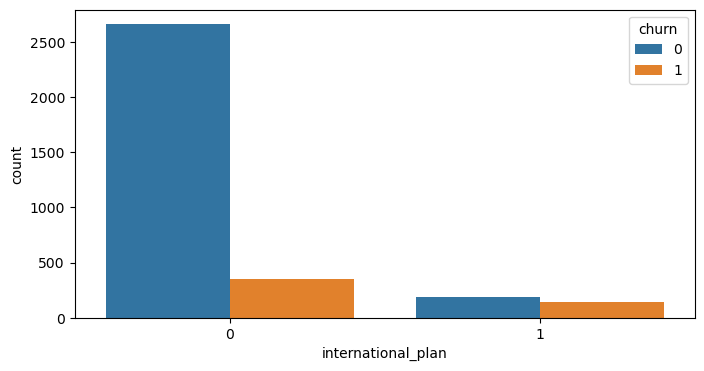

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x = 'international_plan', hue = 'churn', data = df);

when International Plan is enabled, the churn rate is much higher; the usage of the international plan by the customer is a strong feature. We do not observe the same effect with Voice mail plan.

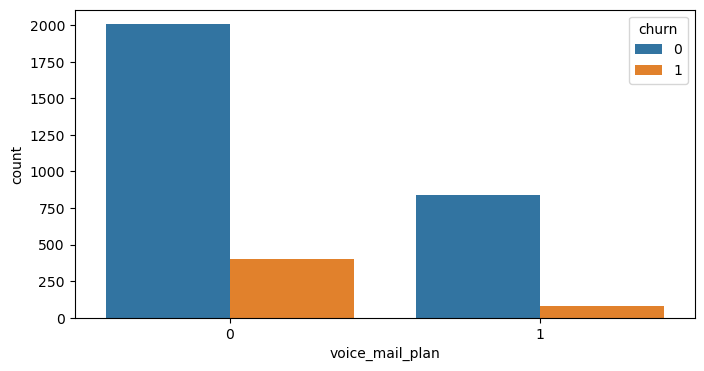

In [17]:
plt.figure(figsize=(8,4))
sns.countplot(x = 'voice_mail_plan', hue = 'churn', data = df);
plt.show();

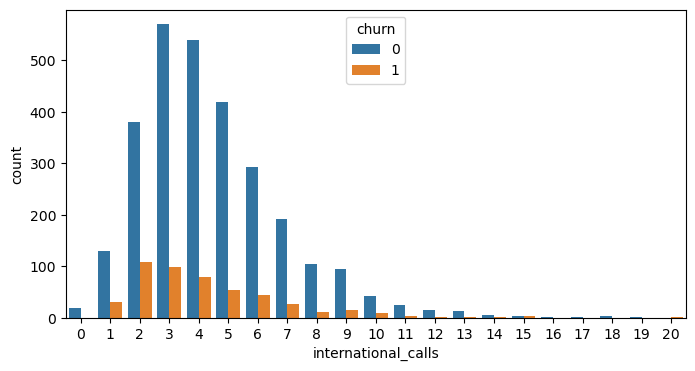

In [18]:
plt.figure(figsize=(8,4))
sns.countplot(x = 'international_calls', hue = 'churn', data = df);

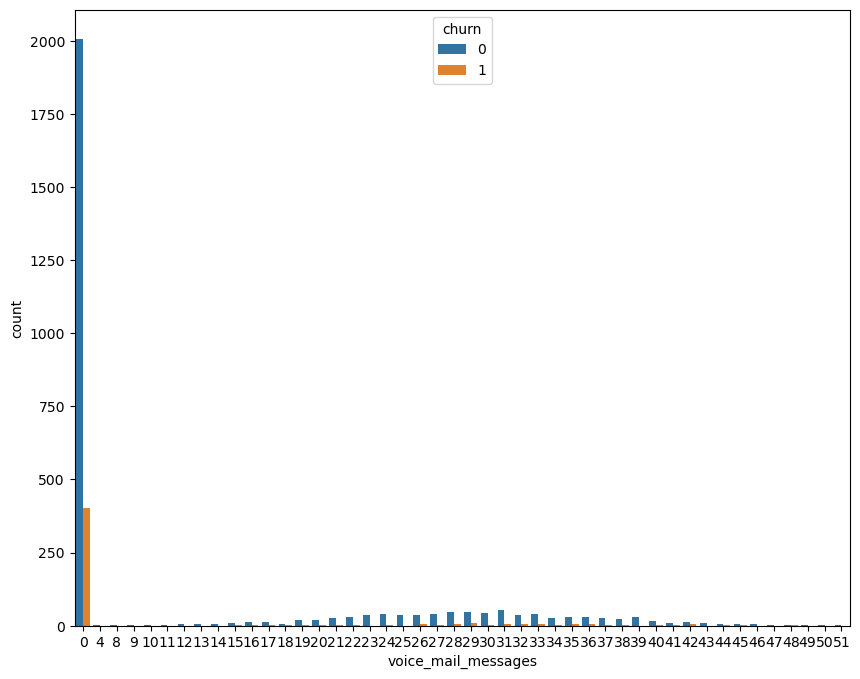

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'voice_mail_messages', hue = 'churn', data = df);


#### Get the correlation

In [20]:
df.corr()

account_length  voice_mail_plan  voice_mail_messages  \
account_length                1.000000         0.002918            -0.004628   
voice_mail_plan               0.002918         1.000000             0.956927   
voice_mail_messages          -0.004628         0.956927             1.000000   
day_mins                      0.006216        -0.001684             0.000778   
evening_mins                 -0.006757         0.021545             0.017562   
night_mins                   -0.008955         0.006079             0.007681   
international_mins            0.009514        -0.001318             0.002856   
customer_service_calls       -0.003796        -0.017824            -0.013263   
international_plan            0.024735         0.006006             0.008745   
day_calls                     0.038470        -0.011086            -0.009548   
day_charge                    0.006214        -0.001686             0.000776   
evening_calls                 0.019260        -0.006444            -0.005864   
evening_charge               -0.006745         0.021559             0.017578   
night_calls                  -0.013176         0.015553             0.007123   
night_charge                 -0.008960         0.006064             0.007663   
international_calls           0.020661         0.007618             0.013957   
international_charge          0.009546        -0.001276             0.002884   
total_charge                  0.001454         0.008585             0.009766   
churn                         0.016541        -0.102148            -0.089728   

                        day_mins  evening_mins  night_mins  \
account_length          0.006216     -0.006757   -0.008955   
voice_mail_plan        -0.001684      0.021545    0.006079   
voice_mail_messages     0.000778      0.017562    0.007681   
day_mins                1.000000      0.007043    0.004323   
evening_mins            0.007043      1.000000   -0.012584   
night_mins              0.004323     -0.012584    1.000000   
international_mins     -0.010155     -0.011035   -0.015207   
customer_service_calls -0.013423     -0.012985   -0.009288   
international_plan      0.049396      0.019100   -0.028905   
day_calls               0.006750     -0.021451    0.022938   
day_charge              1.000000      0.007050    0.004324   
evening_calls           0.015769     -0.011430   -0.002093   
evening_charge          0.007029      1.000000   -0.012592   
night_calls             0.022972      0.007586    0.011204   
night_charge            0.004300     -0.012593    0.999999   
international_calls     0.008033      0.002541   -0.012353   
international_charge   -0.010092     -0.011067   -0.015180   
total_charge            0.884754      0.413143    0.214257   
churn                   0.205151      0.092796    0.035493   

                        international_mins  customer_service_calls  \
account_length                    0.009514               -0.003796   
voice_mail_plan                  -0.001318               -0.017824   
voice_mail_messages               0.002856               -0.013263   
day_mins                         -0.010155               -0.013423   
evening_mins                     -0.011035               -0.012985   
night_mins                       -0.015207               -0.009288   
international_mins                1.000000               -0.009640   
customer_service_calls           -0.009640                1.000000   
international_plan                0.045871               -0.024522   
day_calls                         0.021565               -0.018942   
day_charge                       -0.010157               -0.013427   
evening_calls                     0.008703                0.002423   
evening_charge                   -0.011043               -0.012987   
night_calls                      -0.013605               -0.012802   
night_charge                     -0.015214               -0.009277   
international_calls               0.032304               -0.01

<AxesSubplot:>

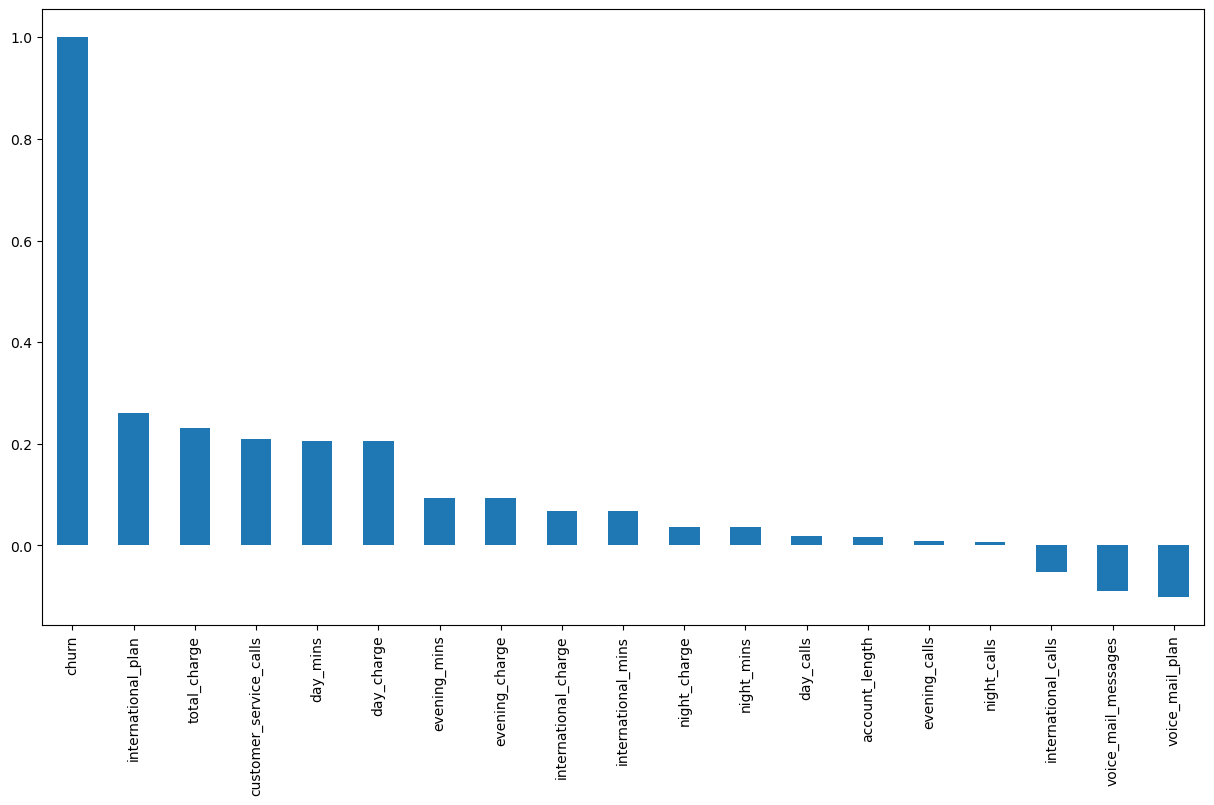

In [21]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
'churn','day_charge','evening_charge','night_charge','international_charge'

Except international calls, voice mail messages and voice mail plan everything is positively related to churn

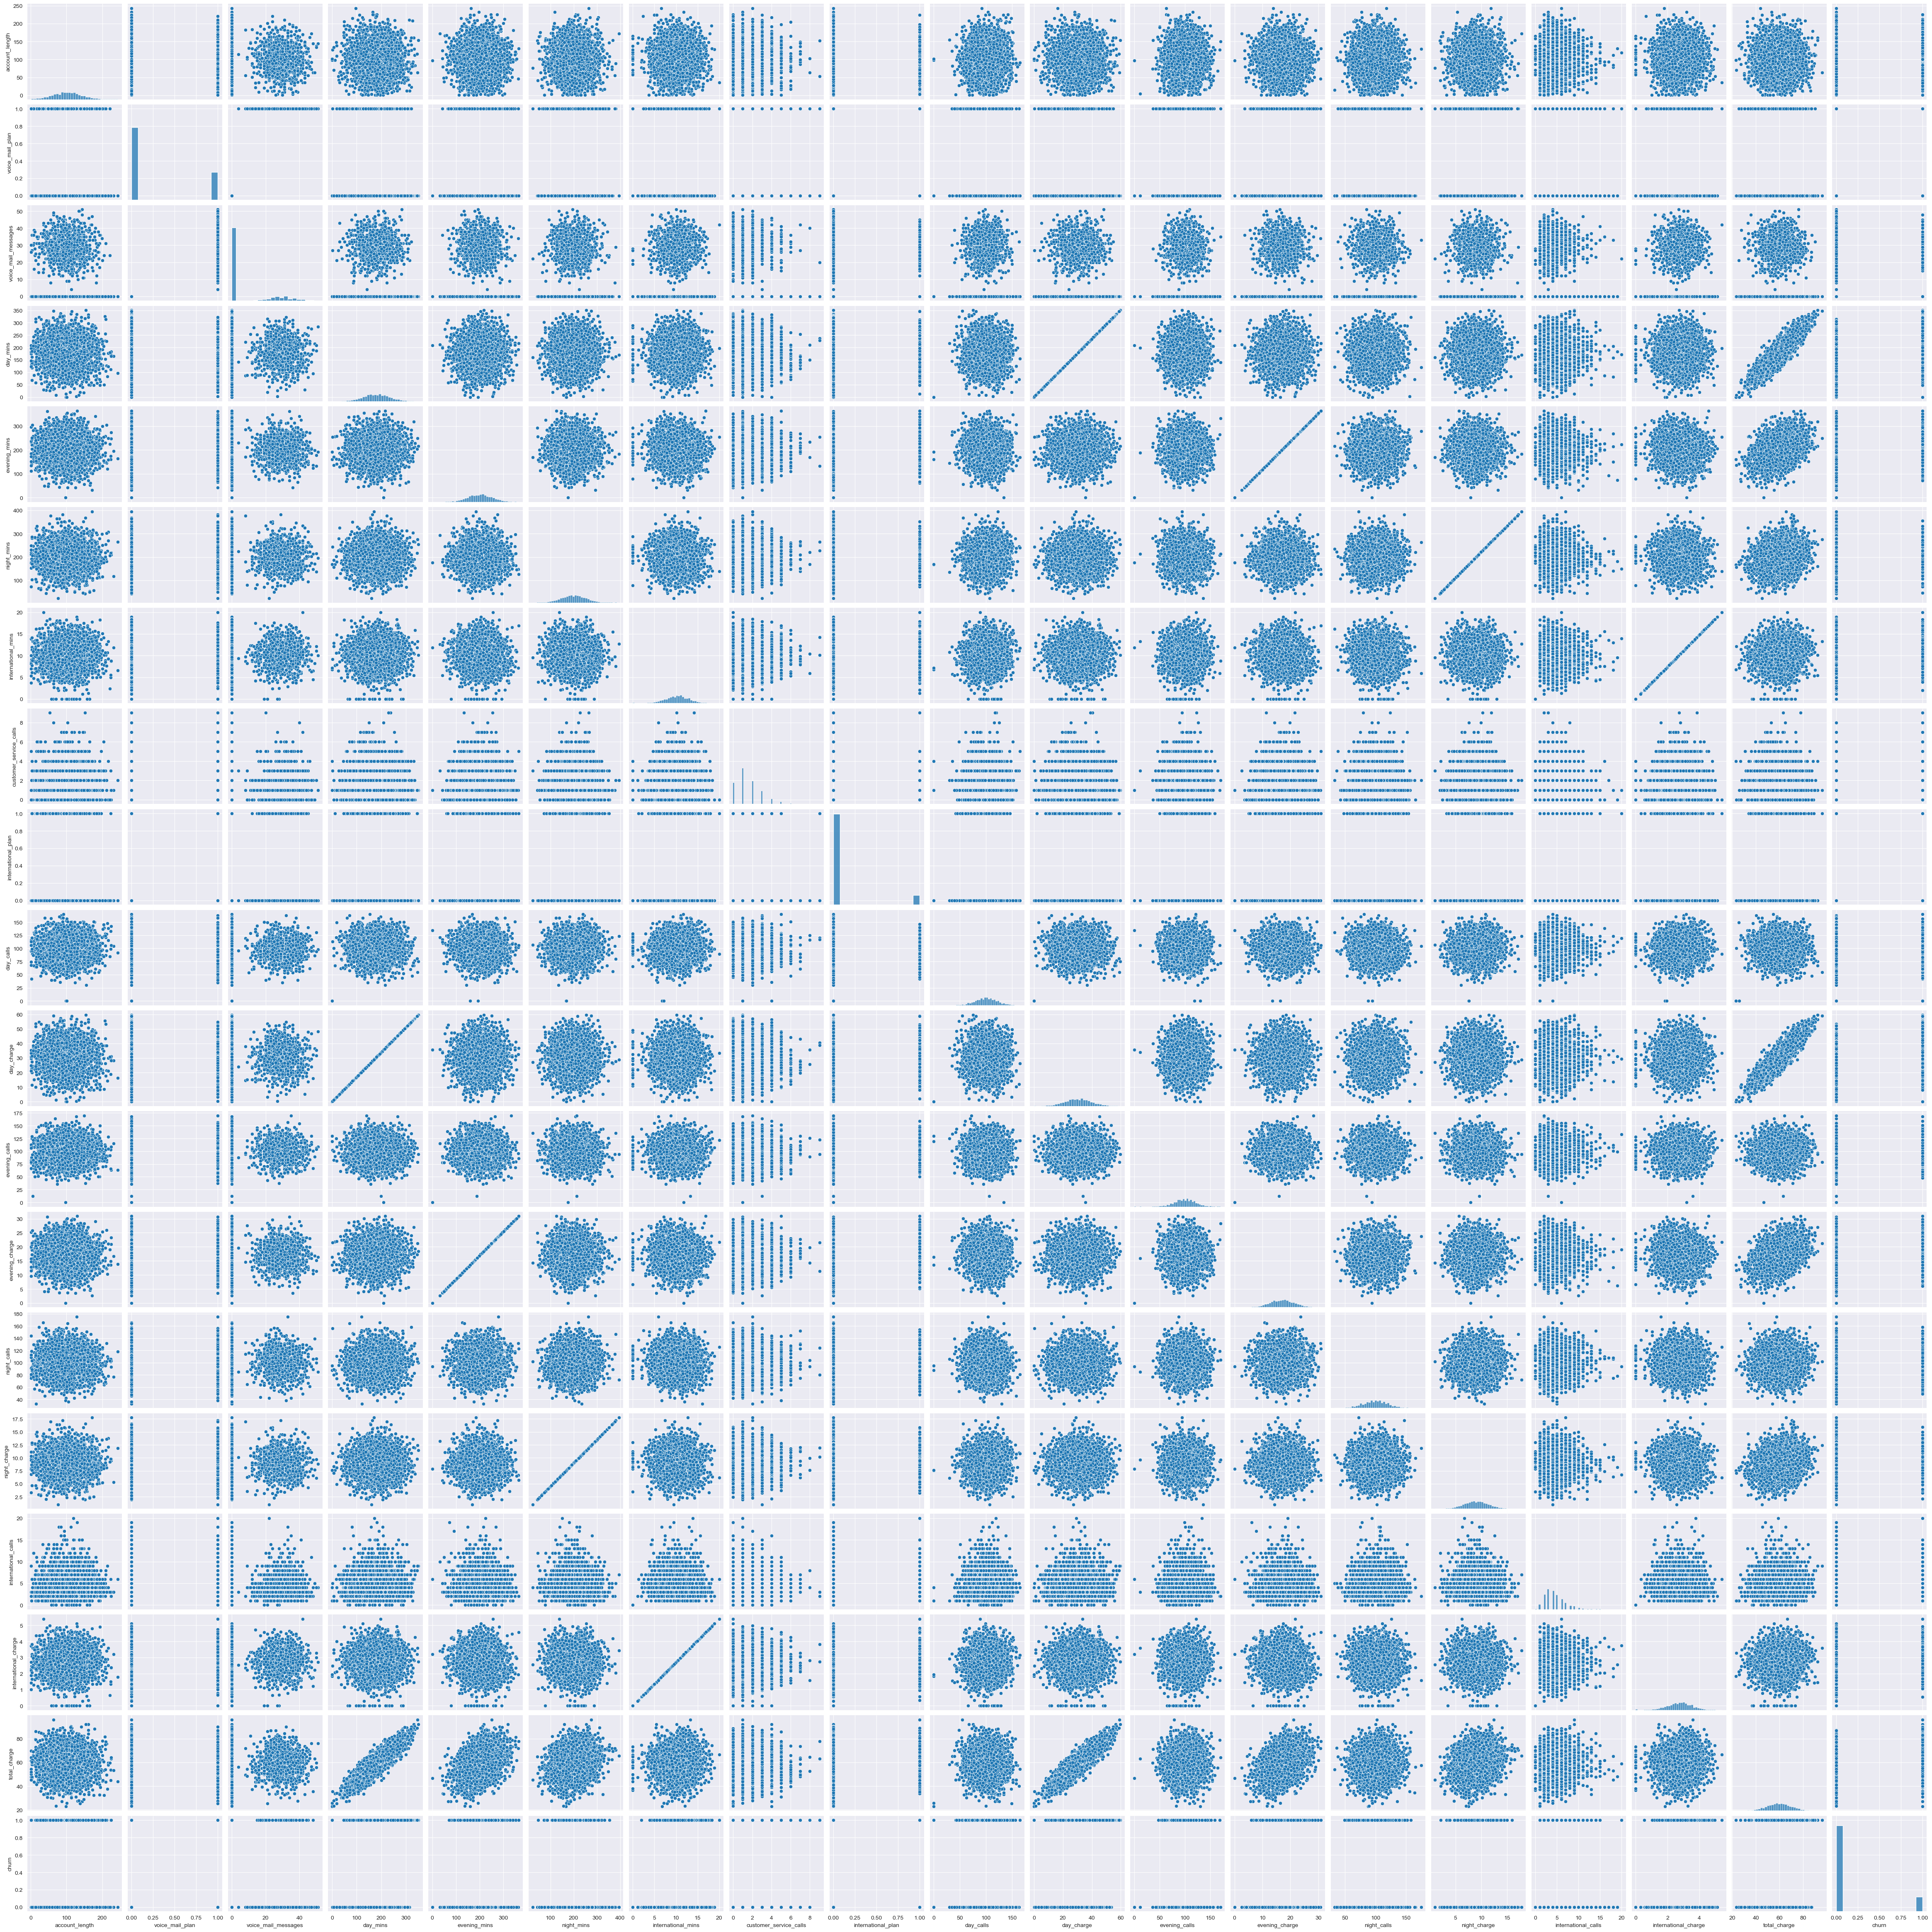

In [22]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

Populating the interactive namespace from numpy and matplotlib


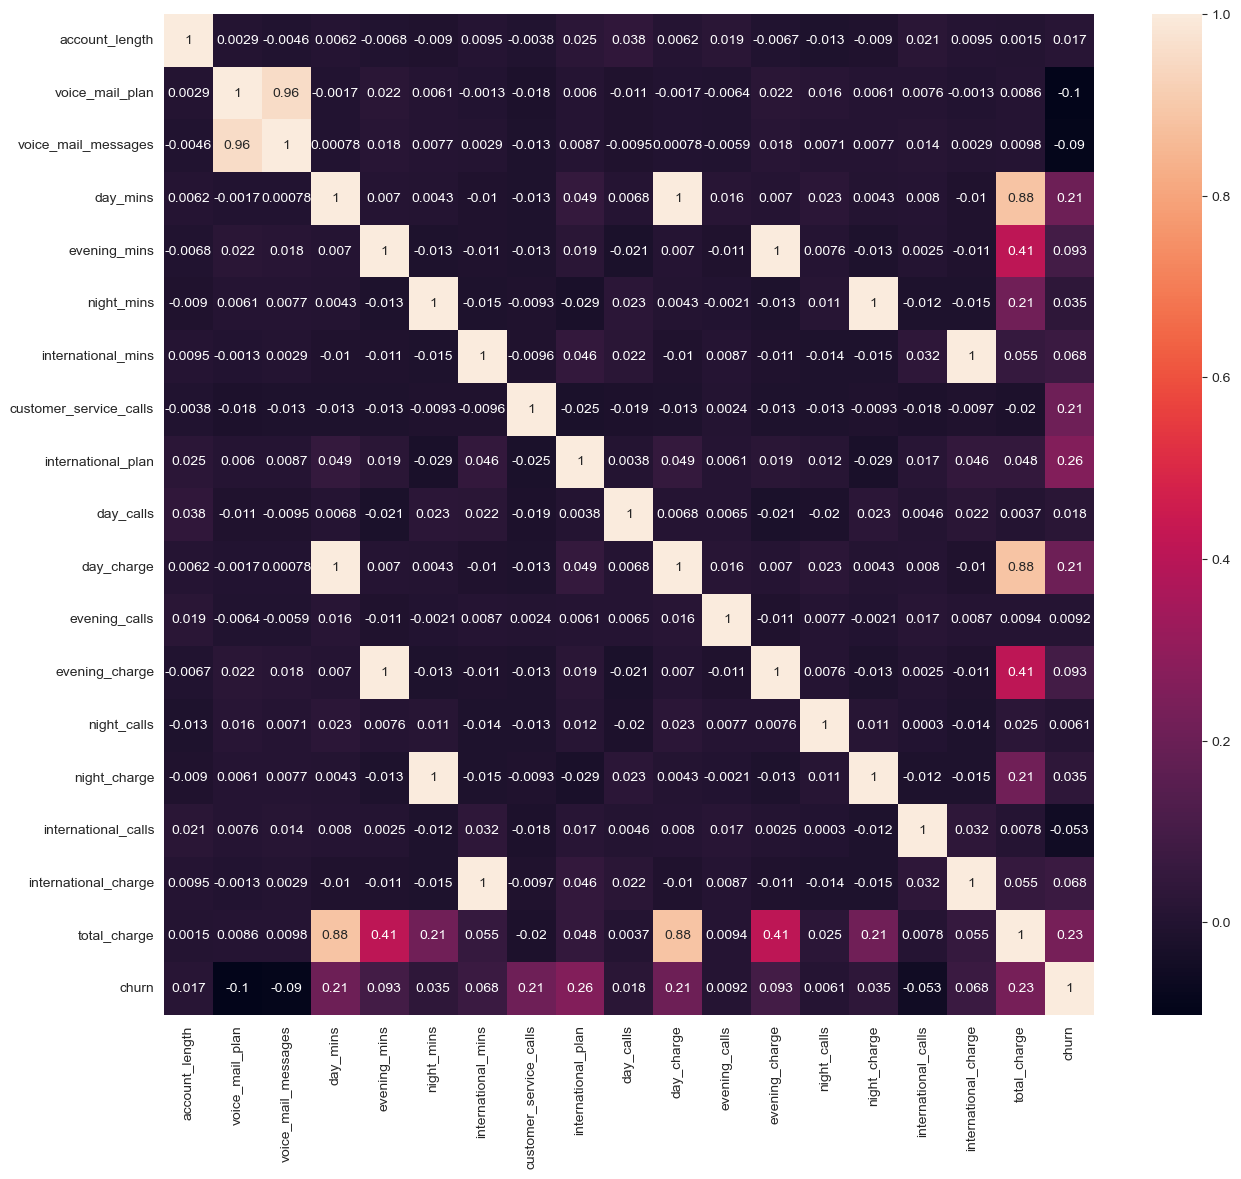

In [23]:
 %pylab inline
plt.figure(figsize(15,13))
sns.heatmap(df.corr(),annot=True)
plt.show()

 total_charge,day_mins,customer_service_call,international_plan and day_charge has the highest correlation with churn


array([[<AxesSubplot:title={'center':'account_length'}>,
        <AxesSubplot:title={'center':'voice_mail_plan'}>,
        <AxesSubplot:title={'center':'voice_mail_messages'}>,
        <AxesSubplot:title={'center':'day_mins'}>],
       [<AxesSubplot:title={'center':'evening_mins'}>,
        <AxesSubplot:title={'center':'night_mins'}>,
        <AxesSubplot:title={'center':'international_mins'}>,
        <AxesSubplot:title={'center':'customer_service_calls'}>],
       [<AxesSubplot:title={'center':'international_plan'}>,
        <AxesSubplot:title={'center':'day_calls'}>,
        <AxesSubplot:title={'center':'day_charge'}>,
        <AxesSubplot:title={'center':'evening_calls'}>],
       [<AxesSubplot:title={'center':'evening_charge'}>,
        <AxesSubplot:title={'center':'night_calls'}>,
        <AxesSubplot:title={'center':'night_charge'}>,
        <AxesSubplot:title={'center':'international_calls'}>],
       [<AxesSubplot:title={'center':'international_charge'}>,
        <AxesSubplot:

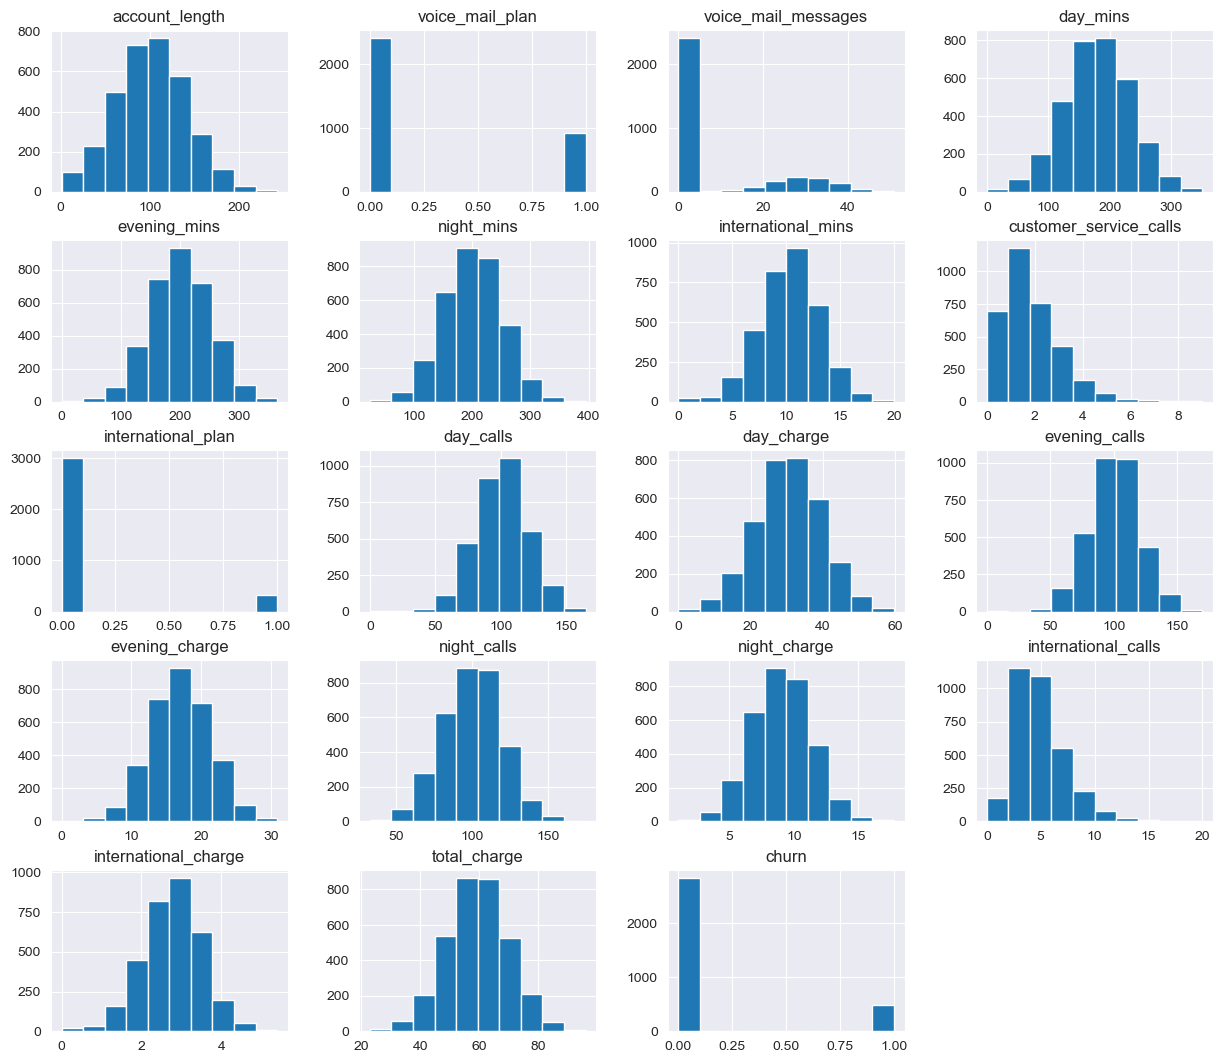

In [24]:
df.hist()

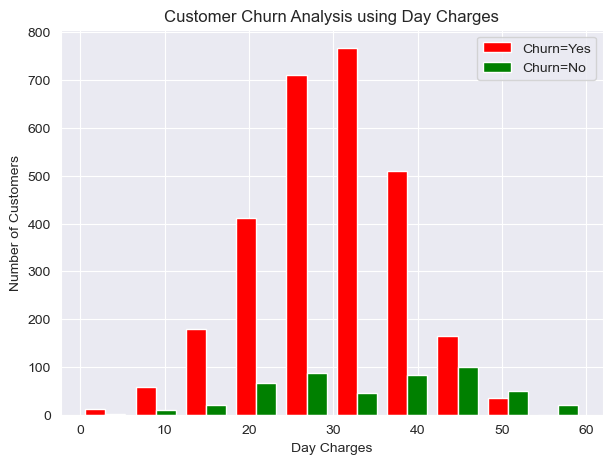

In [25]:
DayCharges_churn_no=df[df["churn"]==1].day_charge # Not leaving the Company

DayCharges_churn_yes=df[df["churn"]==0].day_charge # Leaving the Company

plt.figure(figsize(7,5))
plt.hist([DayCharges_churn_yes, DayCharges_churn_no], color=["red", "green"], label=["Churn=Yes", "Churn=No"])
plt.legend()
plt.xlabel("Day Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Analysis using Day Charges")
plt.show()

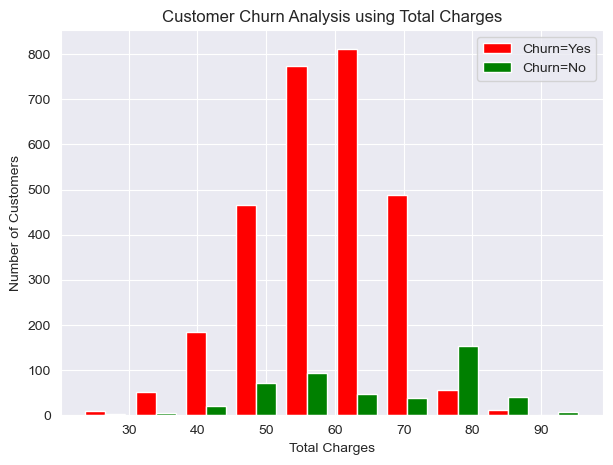

In [26]:
TotalCharges_churn_no=df[df["churn"]==1].total_charge # Not leaving the Company

TotalCharges_churn_yes=df[df["churn"]==0].total_charge # Leaving the Company

plt.figure(figsize(7,5))
plt.hist([TotalCharges_churn_yes,TotalCharges_churn_no ], color=["red", "green"], label=["Churn=Yes", "Churn=No"])
plt.legend()
plt.xlabel("Total Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Analysis using Total Charges")
plt.show()

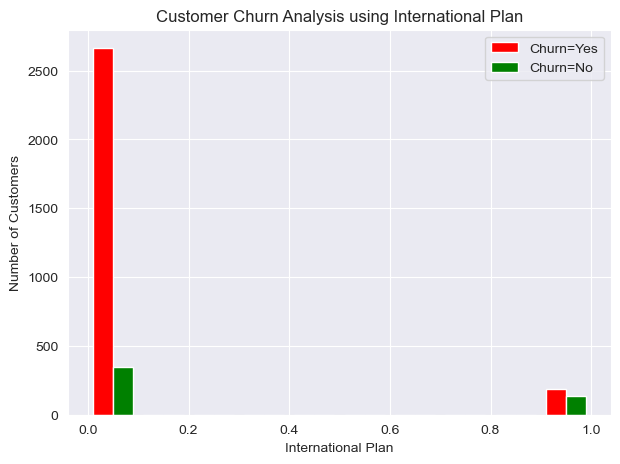

In [27]:
InternationalPlan_churn_no=df[df["churn"]==1].international_plan # Not leaving the Company

InternationalPlan_churn_yes=df[df["churn"]==0].international_plan # Leaving the Company

plt.figure(figsize(7,5))
plt.hist([InternationalPlan_churn_yes,InternationalPlan_churn_no ], color=["red", "green"], label=["Churn=Yes", "Churn=No"])
plt.legend()
plt.xlabel("International Plan")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Analysis using International Plan")
plt.show()

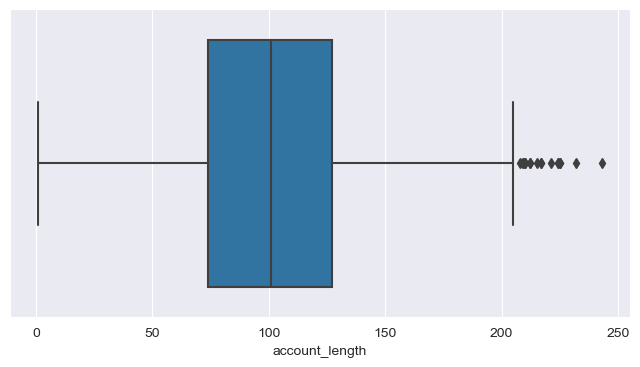

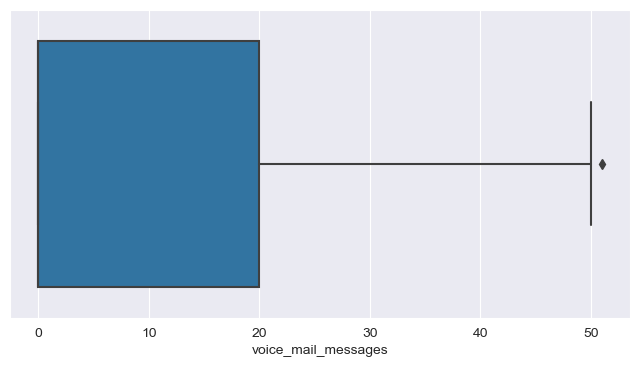

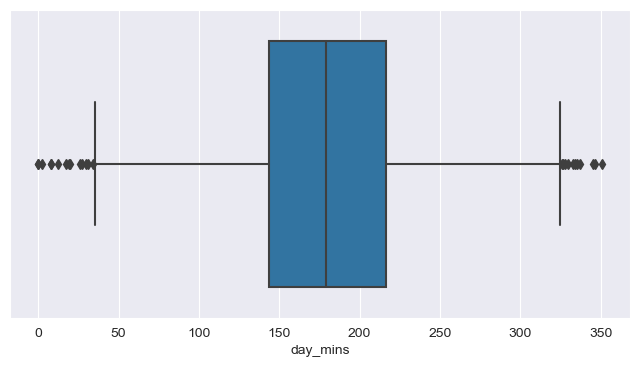

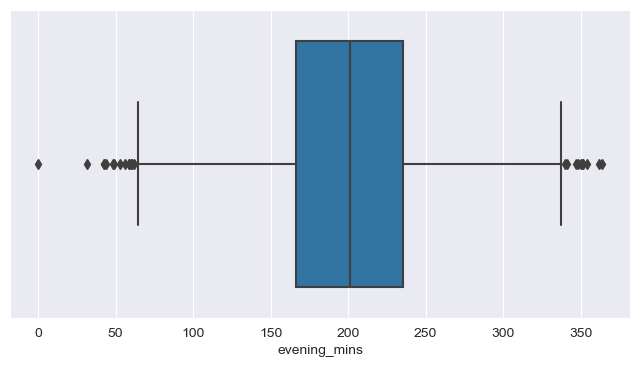

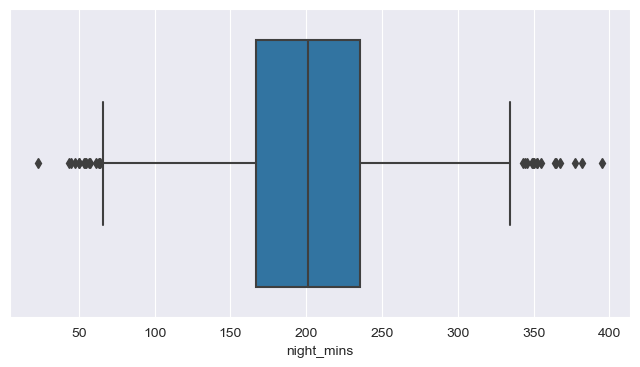

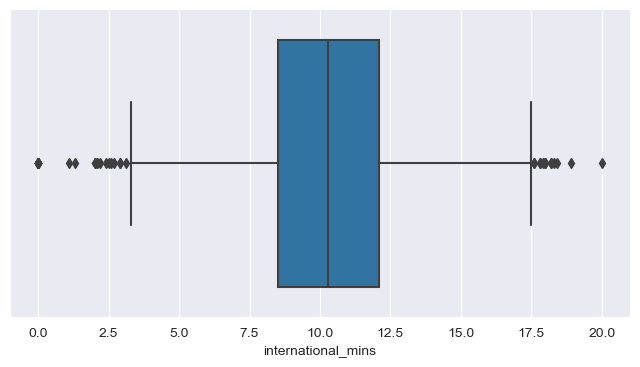

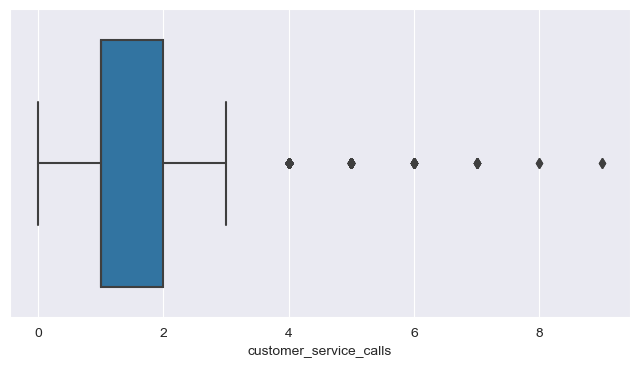

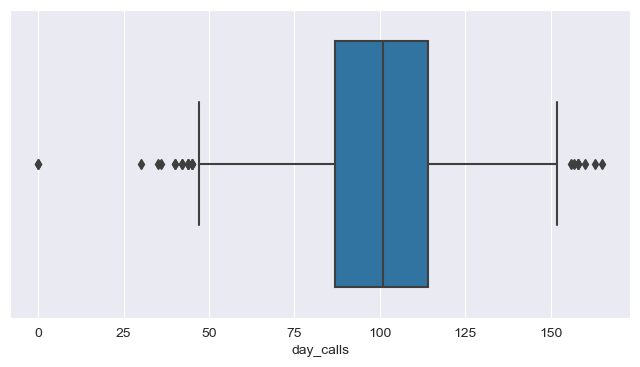

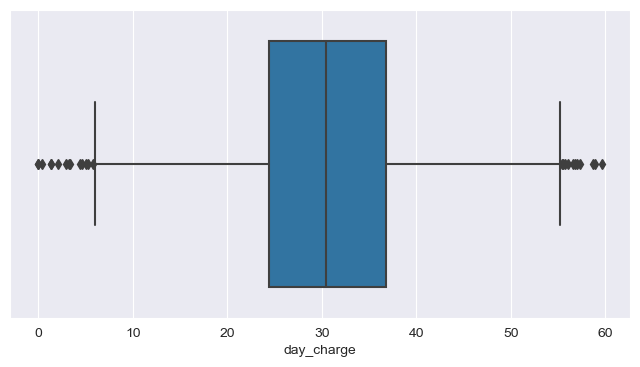

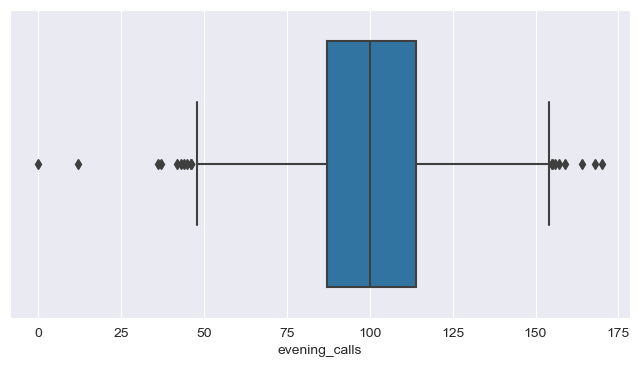

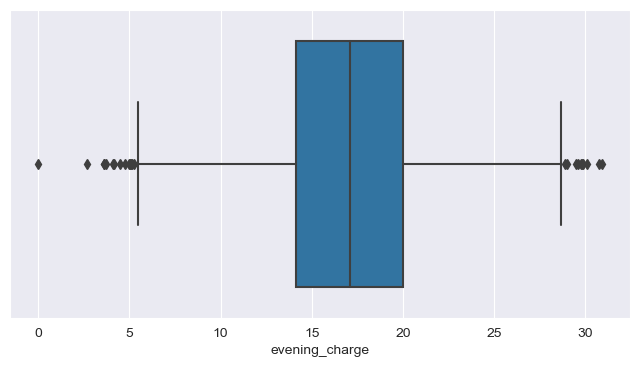

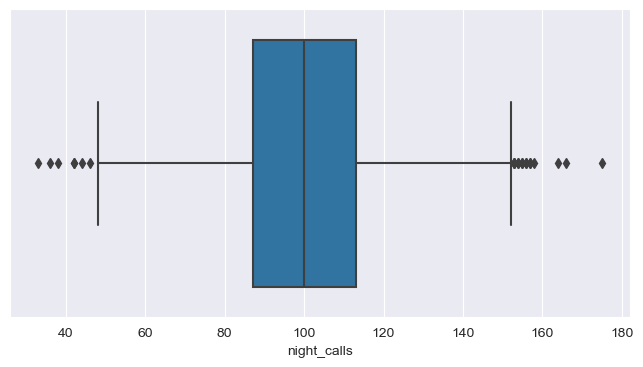

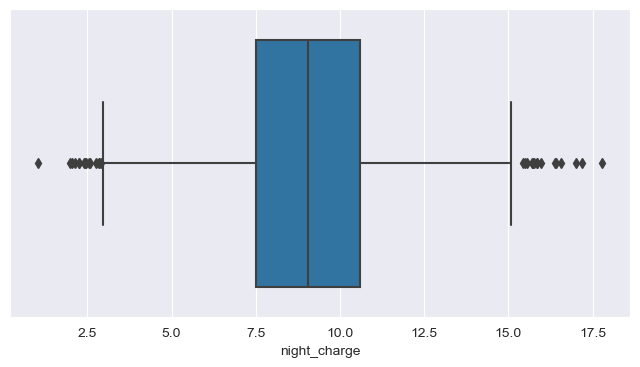

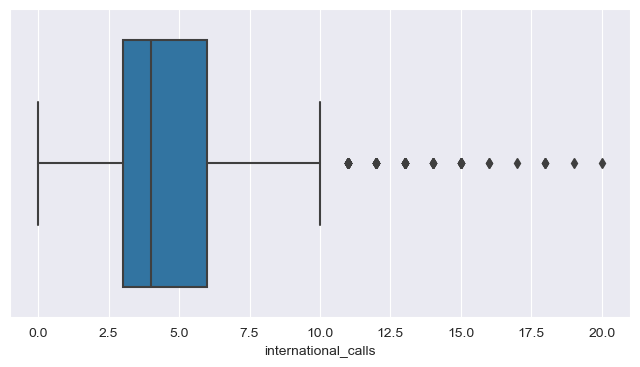

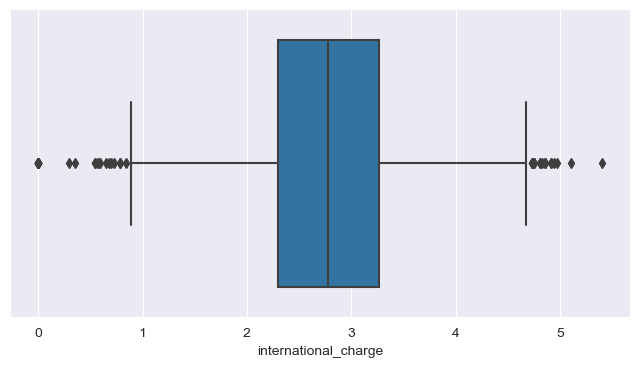

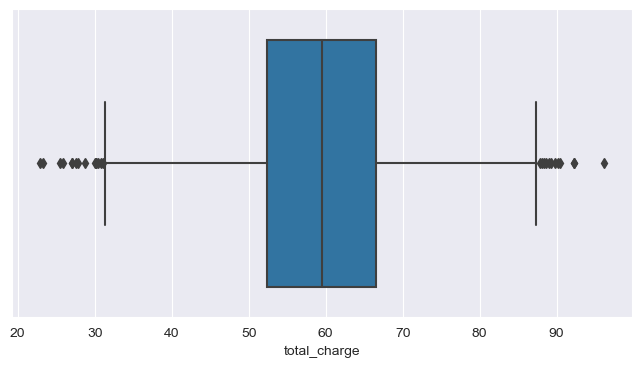

In [28]:
y = ['account_length', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge']
for i in y: 
    plt.figure(figsize=(8,4))
    sns.boxplot(x=i, data=df)
    plt.show()

Text(0.5, 1.0, 'Day charges by churn')

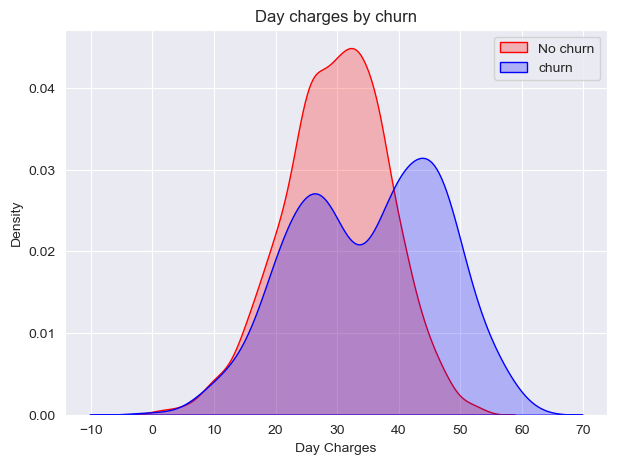

In [29]:
Day_charge = sns.kdeplot(df.day_charge[(df["churn"] == 0) ],
                color="Red", shade = True)
Day_charge = sns.kdeplot(df.day_charge[(df["churn"] == 1) ],
                ax =Day_charge, color="Blue", shade= True)
Day_charge.legend(["No churn","churn"],loc='upper right')
Day_charge.set_ylabel('Density')
Day_charge.set_xlabel('Day Charges')
Day_charge.set_title('Day charges by churn')

Churn is high when Day Charges are high

Text(0.5, 1.0, 'Total charges by churn')

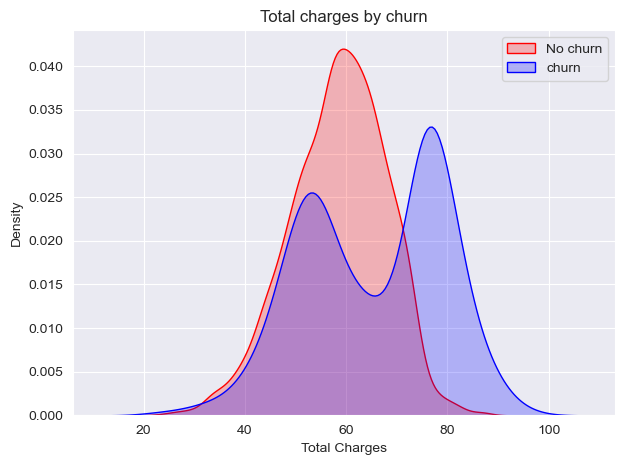

In [30]:
Total_charge = sns.kdeplot(df.total_charge[(df["churn"] == 0) ],
                color="Red", shade = True)
Total_charge = sns.kdeplot(df.total_charge[(df["churn"] == 1) ],
                ax =Total_charge, color="Blue", shade= True)
Total_charge.legend(["No churn","churn"],loc='upper right')
Total_charge.set_ylabel('Density')
Total_charge.set_xlabel('Total Charges')
Total_charge.set_title('Total charges by churn')

churn is high when total charges are high

Total Charge = Day Charge + Eve Charge + Night Charge + Intl Charge. 

### Model Building

In [31]:
# Import Libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [32]:
df.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn'],
      dtype='object')

### total_charge,day_mins,customer_service_call,international_plan and day_charge has the highest correlation with churn

In [34]:
#Creating X and Y variables
X=df.drop(['churn','day_charge','evening_charge','night_charge','international_charge'],axis=1)
X

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0                128                1                   25     265.1   
1                107                1                   26     161.6   
2                137                0                    0     243.4   
3                 84                0                    0     299.4   
4                 75                0                    0     166.7   
...              ...              ...                  ...       ...   
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3331             184                0                    0     213.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
0            197.4       244.7                10.0                       1   
1            195.5       254.4                13.7                       1   
2            121.2       162.6                12.2                       0   
3             61.9       196.9                 6.6                       2   
4            148.3       186.9                10.1                       3   
...            ...         ...                 ...                     ...   
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3331         159.6       139.2                 5.0                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  evening_calls  night_calls  \
0                      0        110             99           91   
1                      0        123            103          103   
2                      0        114            110          104   
3                      1         71             88           89   
4                      1        113            122          121   
...                  ...        ...            ...          ...   
3328                   0         77            126           83   
3329                   0         57             55          123   
3330                   0        109             58           91   
3331                   1        105             84          137   
3332                   0        113             82           77   

      international_calls  total_charge  
0                       3         75.56  
1                       3         59.24  
2                       5         62.29  
3                       7         66.80  
4                       3         52.09  
...                   ...           ...  
3328                    6         60.10  
3329                    4         63.53  
3330                    6         67.74  
3331                   10         57.53  
3332                    4         77.01  

[3333 rows x 14 columns]

In [37]:
Y=df['churn']
Y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int64

In [38]:
#Normalizing the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
MM_Scale = MM.fit_transform(X)
MM_Scale
MM_Scale = pd.DataFrame(MM_Scale)
MM_Scale[0].describe()

count    3333.000000
mean        0.413491
std         0.164554
min         0.000000
25%         0.301653
50%         0.413223
75%         0.520661
max         1.000000
Name: 0, dtype: float64

#### Using SMOTEENN to balance the data 

In [1]:
sm = SMOTEENN()
x,y = sm.fit_resample(X,Y)


NameError: name 'df' is not defined

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [41]:
df_smote = DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)

In [42]:
df_smote.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [43]:
Y_pred = df_smote.predict(X_test)

In [44]:
print(classification_report(Y_test,Y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       323
           1       0.93      0.84      0.88       542

    accuracy                           0.86       865
   macro avg       0.85      0.86      0.85       865
weighted avg       0.87      0.86      0.86       865



In [45]:
print(confusion_matrix(Y_test,Y_pred))

[[288  35]
 [ 88 454]]


In [46]:
print (metrics.accuracy_score(Y_test, Y_pred))

0.8578034682080925


# RandomForest Classifer

In [47]:
#RandomForest Classifer
from sklearn.ensemble import RandomForestClassifier


In [48]:
sm = SMOTEENN()
x,y = sm.fit_resample(X,Y)

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2,)

In [50]:
smote_rf = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)

In [51]:
smote_rf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [52]:
Y_pred_rf =smote_rf.predict(X_test)

In [53]:
print(classification_report(Y_test,Y_pred_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       351
           1       0.94      0.89      0.91       508

    accuracy                           0.90       859
   macro avg       0.89      0.90      0.90       859
weighted avg       0.90      0.90      0.90       859



In [54]:
print(confusion_matrix(Y_test,Y_pred_rf))

[[321  30]
 [ 56 452]]


In [55]:
print (metrics.accuracy_score(Y_test, Y_pred_rf))

0.89988358556461


RandomForestClassifier gave better results than DecisionTreeClassifier

# Logistic Regression

In [56]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [57]:
sm = SMOTEENN()
x,y = sm.fit_resample(X,Y)

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2,)

In [59]:
smote_lr = LogisticRegression()

In [60]:
smote_lr.fit(X_train,Y_train)

C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
Y_pred_lr =smote_lr.predict(X_test)

In [62]:
print(classification_report(Y_test,Y_pred_lr, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.65      0.40      0.50       312
           1       0.72      0.88      0.79       552

    accuracy                           0.71       864
   macro avg       0.69      0.64      0.65       864
weighted avg       0.70      0.71      0.69       864



In [63]:
print(confusion_matrix(Y_test,Y_pred_lr))

[[125 187]
 [ 66 486]]


In [64]:
print (metrics.accuracy_score(Y_test, Y_pred_lr))

0.7071759259259259


From the above three RandomForest gave the better results

# Support Vector Machine

In [65]:
# Support Vector Machine
from sklearn.svm import SVC

In [66]:
sm = SMOTEENN()
x,y = sm.fit_resample(X,Y)

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2,)

In [68]:
smote_svm = SVC(kernel='linear') 

In [69]:
smote_svm.fit(X_train,Y_train)

SVC(kernel='linear')

In [70]:
Y_pred_svm =smote_svm.predict(X_test)

In [71]:
print(classification_report(Y_test,Y_pred_svm,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.73      0.51      0.60       354
           1       0.72      0.87      0.79       509

    accuracy                           0.72       863
   macro avg       0.72      0.69      0.69       863
weighted avg       0.72      0.72      0.71       863



In [72]:
print (metrics.accuracy_score(Y_test, Y_pred_svm))

0.7207415990730012


In [73]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier

In [74]:
sm = SMOTEENN()
x,y = sm.fit_resample(X,Y)

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2,)

In [76]:
smote_ada = AdaBoostClassifier()

In [77]:
smote_ada.fit(X_train,Y_train)

AdaBoostClassifier()

In [78]:
Y_pred_ada=smote_ada.predict(X_test)

In [79]:
print(classification_report(Y_test,Y_pred_ada,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       326
           1       0.89      0.88      0.88       534

    accuracy                           0.86       860
   macro avg       0.85      0.85      0.85       860
weighted avg       0.86      0.86      0.86       860



In [80]:
print (metrics.accuracy_score(Y_test, Y_pred_ada))

0.8569767441860465


In [81]:
#XG Boost
from xgboost import XGBClassifier

In [82]:
sm = SMOTEENN()
x,y = sm.fit_resample(X,Y)

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2,)

In [84]:
smote_xg = XGBClassifier()

In [85]:
smote_xg.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [86]:
Y_pred_xg=smote_ada.predict(X_test)

In [87]:
print(classification_report(Y_test,Y_pred_xg,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       309
           1       0.91      0.89      0.90       549

    accuracy                           0.87       858
   macro avg       0.86      0.87      0.86       858
weighted avg       0.87      0.87      0.87       858



In [88]:
print (metrics.accuracy_score(Y_test, Y_pred_xg))

0.8741258741258742


#### RandomForest and XGboost gave the better results
Let's now check out the bar graph of RandomForest to get a better conclusion

<AxesSubplot:>

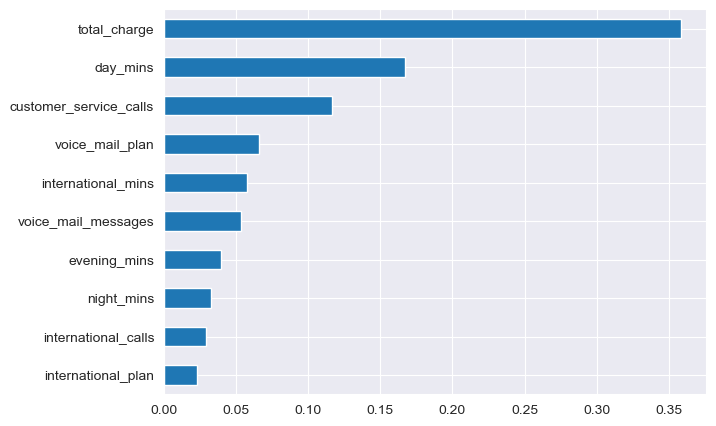

In [89]:
importances = smote_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

#### Observations:

From random forest algorithm, Total charges,day_mins and customer service calls are the most important predictor variables to predict churn.
The results from random forest are very similar to that of the XB boost.

